In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pylab
from pylab import legend, plot, show, title, xlabel, ylabel
import seaborn as sns
from numpy import random
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import os
import scipy 
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson, norm, t
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

# from statsmodels import discrete
# from statsmodels.discrete import discrete_model
# from statsmodels.discrete.discrete_model import MNLogit #multi nominal
# from statsmodels.miscmodels.ordinal_model import OrderedModel #multi nominal

# import statsmodels.formula.api as smf
# from statsmodels.discrete.discrete_model import Poisson as psn

# from statsmodels.discrete.discrete_model import NegativeBinomial as ngb
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import mutual_info_classif
# from sklearn.feature_selection import mutual_info_classif
# from sklearn.feature_selection import SelectKBest
# from sklearn.ensemble import ExtraTreesClassifier

# from sklearn.feature_selection import SequentialFeatureSelector
# from sklearn.linear_model import LinearRegression

# from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV

# from sklearn.linear_model import Lasso
# from sklearn.model_selection import GridSearchCV

# from sklearn.tree import DecisionTreeClassifier,plot_tree
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn import svm

# from sklearn.cluster import KMeans
# import scipy.cluster.hierarchy as sch
# from statsmodels.tsa.seasonal import seasonal_decompose
# from sklearn.metrics import mean_squared_error
# import warnings 
# warnings.filterwarnings('ignore')

# from statsmodels.tsa.api import SimpleExpSmoothing
# from statsmodels.tsa.api import Holt

# from statsmodels.tsa.stattools import adfuller
# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.stattools import adfuller

In [2]:
# cars=pd.read_csv('used_cars_data.csv')  #enter path of dataset here

In [3]:
# !pip install kagglehub

In [4]:
#run only once to download the dataset-
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("ananaymital/us-used-cars-dataset")

# print("Path to dataset files:", path)

In [6]:
path=r'C:\Users\AAYUSH\Desktop\pml_dataset\used_cars_data.csv'
cars=pd.read_csv(path)

C:\Users\AAYUSH\AppData\Local\Temp\ipykernel_13244\3143018783.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  cars=pd.read_csv(path)


In [7]:
cars.head()

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [8]:
cars.count()

vin                     3000040
back_legroom            2840771
bed                       19568
bed_height               429098
bed_length               429098
                         ...   
wheel_system            2853308
wheel_system_display    2853308
wheelbase               2840771
width                   2840771
year                    3000040
Length: 66, dtype: int64

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 66 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   vin                      object 
 1   back_legroom             object 
 2   bed                      object 
 3   bed_height               object 
 4   bed_length               object 
 5   body_type                object 
 6   cabin                    object 
 7   city                     object 
 8   city_fuel_economy        float64
 9   combine_fuel_economy     float64
 10  daysonmarket             int64  
 11  dealer_zip               object 
 12  description              object 
 13  engine_cylinders         object 
 14  engine_displacement      float64
 15  engine_type              object 
 16  exterior_color           object 
 17  fleet                    object 
 18  frame_damaged            object 
 19  franchise_dealer         bool   
 20  franchise_make           object 
 21  front_le

<Axes: >

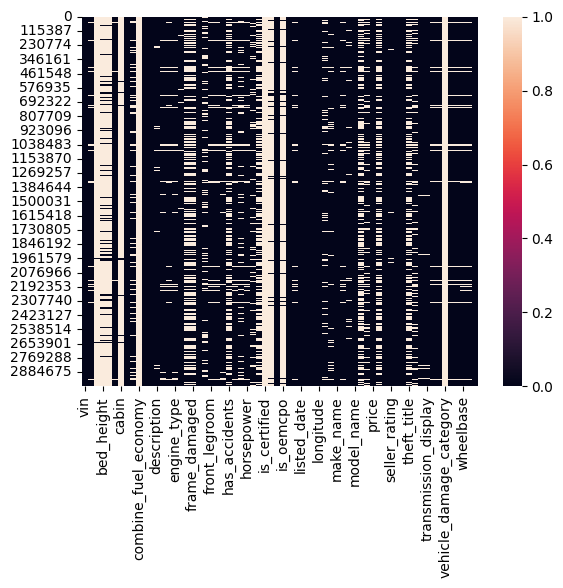

In [10]:
# sns.heatmap(cars.isna())

In [11]:
df_null_perc=((cars.isna().sum()/cars.shape[0])*100).sort_values(ascending=False)

In [12]:
pd.set_option('display.max_rows', None)
print(df_null_perc)
pd.reset_option('display.max_rows', None)

is_certified               100.000000
combine_fuel_economy       100.000000
vehicle_damage_category    100.000000
bed                         99.347742
cabin                       97.882262
is_oemcpo                   95.487993
is_cpo                      93.903481
bed_length                  85.696924
bed_height                  85.696924
owner_count                 50.566426
salvage                     47.552533
theft_title                 47.552533
frame_damaged               47.552533
fleet                       47.552533
has_accidents               47.552533
isCab                       47.552533
franchise_make              19.087579
torque                      17.259537
city_fuel_economy           16.375948
highway_fuel_economy        16.375948
power                       16.047319
interior_color              12.799363
main_picture_url            12.302936
major_options                6.668178
engine_displacement          5.746123
horsepower                   5.746123
width       

In [13]:
cars.shape

(3000040, 66)

In [14]:
cars.is_certified.isna().sum()

np.int64(3000040)

In [15]:
#removing all rows where percentage of null values is greater than 80%


In [17]:
# engine_displacement          

In [ ]:
# engine_displacement -       5.746123
# horsepower                   5.746123
# combine_fuel_economy       100.000000
# body_type                    0.451427
# is_new                       0.000000
# is_certified               100.00000
# daysonmarket                 0.000000
# has_accidents               47.552533
# city                         0.000000
# dealer_zip                   0.000000


# is_cpo                      93.903481



In [ ]:
# is_certified               100.000000
# combine_fuel_economy       100.000000
# vehicle_damage_category    100.000000
# bed                         99.347742
# cabin                       97.882262
# is_oemcpo                   95.487993
# is_cpo                      93.903481
# bed_length                  85.696924
# bed_height                  85.696924
# owner_count                 50.566426
# salvage                     47.552533
# theft_title                 47.552533
# frame_damaged               47.552533
# fleet                       47.552533
# has_accidents               47.552533
# isCab                       47.552533
# franchise_make              19.087579
# torque                      17.259537
# city_fuel_economy           16.375948
# highway_fuel_economy        16.375948
# power                       16.047319
# interior_color              12.799363
# main_picture_url            12.302936
# major_options                6.668178
# engine_displacement          5.746123
# horsepower                   5.746123
# width                        5.308896
# back_legroom                 5.308896
# front_legroom                5.308896
# height                       5.308896
# fuel_tank_volume             5.308896
# length                       5.308896
# maximum_seating              5.308896
# wheelbase                    5.308896
# wheel_system_display         4.891001
# wheel_system                 4.891001
# mileage                      4.812836
# trim_name                    3.876415
# trimId                       3.860849
# engine_cylinders             3.352655
# engine_type                  3.352655
# fuel_type                    2.757430
# description                  2.596665
# transmission                 2.139471
# transmission_display         2.139471
# exterior_color               1.665144
# seller_rating                1.362382
# body_type                    0.451427
# sp_id                        0.003200
# vin                          0.000000
# is_new                       0.000000
# franchise_dealer             0.000000
# daysonmarket                 0.000000
# dealer_zip                   0.000000
# city                         0.000000
# listed_date                  0.000000
# longitude                    0.000000
# listing_id                   0.000000
# price                        0.000000
# model_name                   0.000000
# make_name                    0.000000
# latitude                     0.000000
# listing_color                0.000000
# sp_name                      0.000000
# savings_amount               0.000000
# year                         0.000000

In [18]:
# is_certified               100.000000
# combine_fuel_economy       100.000000
# vehicle_damage_category    100.000000
# bed                         99.347742
# cabin                       97.882262
# is_oemcpo                   95.487993
# is_cpo                      93.903481
# bed_length                  85.696924
# bed_height

In [22]:
df_nulls=df_null_perc[df_null_perc>80].index   #stores the columns with more than 80% null values
df_nulls

Index(['is_certified', 'combine_fuel_economy', 'vehicle_damage_category',
       'bed', 'cabin', 'is_oemcpo', 'is_cpo', 'bed_length', 'bed_height'],
      dtype='object')

In [20]:
cleaned_cars=cars.drop(df_nulls,axis=1)

In [21]:
((cleaned_cars.isna().sum()/cleaned_cars.shape[0])*100).sort_values(ascending=False) #thus high null value columns are dropped

owner_count             50.566426
has_accidents           47.552533
isCab                   47.552533
frame_damaged           47.552533
fleet                   47.552533
salvage                 47.552533
theft_title             47.552533
franchise_make          19.087579
torque                  17.259537
highway_fuel_economy    16.375948
city_fuel_economy       16.375948
power                   16.047319
interior_color          12.799363
main_picture_url        12.302936
major_options            6.668178
horsepower               5.746123
engine_displacement      5.746123
maximum_seating          5.308896
fuel_tank_volume         5.308896
height                   5.308896
front_legroom            5.308896
back_legroom             5.308896
wheelbase                5.308896
length                   5.308896
width                    5.308896
wheel_system_display     4.891001
wheel_system             4.891001
mileage                  4.812836
trim_name                3.876415
trimId        

In [23]:
df_nulls_45_and_51=df_null_perc[(df_null_perc<51) & (df_null_perc>45)]#.index 

In [24]:
df_nulls_45_and_51

owner_count      50.566426
salvage          47.552533
theft_title      47.552533
frame_damaged    47.552533
fleet            47.552533
has_accidents    47.552533
isCab            47.552533
dtype: float64

In [25]:
cleaned_cars[df_nulls_45_and_51.index]#.value_counts()

,owner_count,salvage,theft_title,frame_damaged,fleet,has_accidents,isCab
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,False,False,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3000035,1.0,False,False,False,True,False,True
3000036,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000037,2.0,False,False,False,False,True,False
3000038,1.0,False,False,False,False,False,False


In [26]:
#for finding unique values in columns having  between 45 to 51 % of null values
for i in df_nulls_45_and_51.index:
    print(cleaned_cars[i].value_counts())
    print()

owner_count
1.0     972936
2.0     330624
3.0     116775
4.0      39764
5.0      14207
6.0       5286
7.0       1977
8.0        836
9.0        366
10.0       128
11.0        73
12.0        21
13.0        16
14.0         7
15.0         6
16.0         3
19.0         1
18.0         1
Name: count, dtype: int64

salvage
False    1562918
True       10527
Name: count, dtype: int64

theft_title
False    1568179
True        5266
Name: count, dtype: int64

frame_damaged
False    1558494
True       14951
Name: count, dtype: int64

fleet
False    1238507
True      334938
Name: count, dtype: int64

has_accidents
False    1330491
True      242954
Name: count, dtype: int64

isCab
False    1286504
True      286941
Name: count, dtype: int64



for fleet dataset-
 
False    12,38,507 ~12 lakhs  4

True      3,34,938 ~3 lakhs   1

In [27]:
#random example fort shuffling
x=np.array([1,1,1,1,1,2,2,2,2,2,2,2])
np.random.shuffle(x)

In [28]:
x

array([1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1])

**For fleet-**

In [ ]:
cleaned_cars['fleet']


In [ ]:
nl_has_acc=np.where(cleaned_cars['has_accidents'].isnull())[0]
nl_has_acc

In [ ]:
cleaned_cars['has_accidents'].value_counts()


In [ ]:
cleaned_cars['has_accidents'].value_counts()/1573445


In [ ]:
# 80:20 = 4:1  = False:True in is_accidents


In [ ]:
cleaned_cars['has_accidents'].isna().sum()  #total null values

In [ ]:
cleaned_cars['has_accidents'].isna().sum()/5

In [ ]:
print('True',285319)
print('False',285319*4)


In [ ]:
1141276+285319

In [ ]:
np.array(([1,0]*5)).astype(bool)


In [ ]:
arr_of_1_0_for_has_acc=np.array([1]*285319+[0]*1141276).astype(bool)
arr_of_1_0_for_has_acc

In [ ]:
sum(arr_of_1_0_for_has_acc)

In [ ]:
np.random.shuffle(arr_of_1_0_for_has_acc)

In [ ]:
pd.reset_option('display.max_rows', None)

In [ ]:
arr_of_1_0_for_has_acc

In [ ]:
nl_has_acc

In [ ]:
cleaned_cars.loc[nl_has_acc,'has_accidents']=arr_of_1_0_for_has_acc

In [ ]:
cleaned_cars['has_accidents'].isna().sum()

In [ ]:
# for i in arr_of_1_0_for_has_acc:print(i)

**for has_accidents-**

In [ ]:
cleaned_cars['has_accidents']

In [ ]:
nl_has_acc=np.where(cleaned_cars['has_accidents'].isnull())[0]
nl_has_acc

In [ ]:
cleaned_cars['has_accidents'].value_counts()

In [ ]:
# nl_has_acc[False]/

In [ ]:
cleaned_cars['has_accidents'].value_counts()/1573445

In [ ]:
# 80:20 = 4:1  = False:True in is_accidents

In [ ]:
cleaned_cars['has_accidents'].isna().sum()  #total null values

In [ ]:
cleaned_cars['has_accidents'].isna().sum()/5

In [ ]:
print('True',285319)
print('False',285319*4)


In [ ]:
1141276+285319

In [ ]:
np.array(([1,0]*5)).astype(bool)

In [ ]:
arr_of_1_0_for_has_acc=np.array([1]*285319+[0]*1141276).astype(bool)
arr_of_1_0_for_has_acc

In [ ]:
sum(arr_of_1_0_for_has_acc)

In [ ]:
np.random.shuffle(arr_of_1_0_for_has_acc)

In [ ]:
pd.reset_option('display.max_rows', None)

In [ ]:
arr_of_1_0_for_has_acc

In [ ]:
nl_has_acc

In [ ]:
cleaned_cars.loc[nl_has_acc,'has_accidents']=arr_of_1_0_for_has_acc

In [ ]:
cleaned_cars['has_accidents'].isna().sum()

In [ ]:
# for i in arr_of_1_0_for_has_acc:print(i)